<a href="https://colab.research.google.com/github/OllyMuh/ML_algorythms/blob/main/Normalization%20%2B%20Standardization%2BSGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ДЗ 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск**

https://habr.com/ru/post/527334/

https://wiki.loginom.ru/articles/data-normalization.html

https://wiki.loginom.ru/articles/data-standartization.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [ ]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

# **Нормализация [0, 1]**

In [ ]:
X[1].min(), X[1].max()

(0, 10)

In [ ]:
X[2].min(), X[2].max()

(450, 2000)

In [ ]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 5.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [ ]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.5       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

# **Стандартизация**

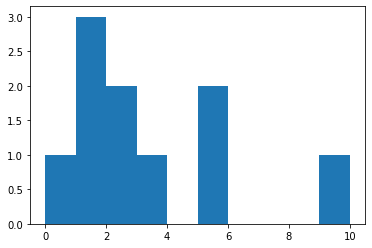

In [ ]:
plt.hist(X[1])
plt.show()

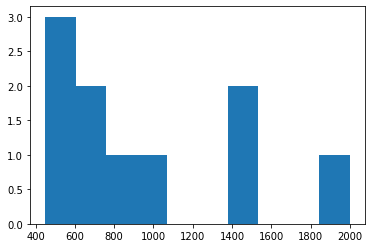

In [ ]:
plt.hist(X[2])
plt.show()

In [ ]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()
print(X1_mean, X1_std)

3.0 2.8284271247461903


In [ ]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-7.07106781e-01, -7.07106781e-01, -3.53553391e-01,
         7.07106781e-01,  0.00000000e+00, -1.06066017e+00,
         7.07106781e-01,  2.47487373e+00, -7.07106781e-01,
        -3.53553391e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

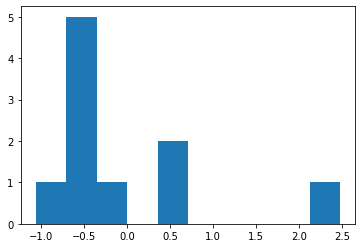

In [ ]:
plt.hist(X_st[1])
plt.show()

In [ ]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [ ]:
X_st[2] = calc_std_fit(X[2])

In [ ]:
X_st[3] = calc_std_fit(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.70710678, -0.70710678, -0.35355339,  0.70710678,  0.        ,
        -1.06066017,  0.70710678,  2.47487373, -0.70710678, -0.35355339],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

# **SGD (Stochastic gradient descent)**

In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [ ]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

100 [49.00767324  5.02757596  2.69519374  4.59738845] 85.00776854836143
200 [55.50637095  5.45484529  2.09580147  4.87136674] 26.958091489740816
300 [56.36822536  5.70753284  1.61254849  5.12518203] 25.582712352603487
400 [56.48252411  5.870487    1.23201481  5.35911439] 25.33699528337865
500 [56.49768235  5.97962433  0.92925971  5.56477314] 25.189741059388403
600 [56.49969263  6.05551286  0.68657146  5.7406775 ] 25.093473614735835
700 [56.49995924  6.11015872  0.49100675  5.88862594] 25.029928115986255
800 [56.49999459  6.15072227  0.33283972  6.01174325] 24.987830404604992
900 [56.49999928  6.18159102  0.20459745  6.11349204] 24.95989559359023
1000 [56.4999999   6.20554166  0.10043951  6.19720001] 24.941344873741578


array([56.4999999 ,  6.20554166,  0.10043951,  6.19720001])

In [ ]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
#             print(b, n_batch, start_, end_)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]

            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)

            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [ ]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=4, alpha=1e-2)

500 [56.5078844   5.8603579   1.23205551  5.3820765 ] 13.265905461906325
1000 [56.5104632   6.19022899  0.19706746  6.12660152] 12.028395240176915
1500 [56.51056232  6.27071801 -0.163192    6.41855495] 11.55507817576229
2000 [56.5105994   6.29771752 -0.29217333  6.52481682] 11.384614196936464
2500 [56.51061281  6.30733012 -0.33854119  6.56310652] 11.323473239751284
3000 [56.51061764  6.31078301 -0.35521985  6.57688402] 11.301512225634744
3500 [56.51061937  6.31202488 -0.36121972  6.58184048] 11.293616893689713
4000 [56.51062     6.31247162 -0.36337809  6.58362351] 11.290777300232541
4500 [56.51062022  6.31263232 -0.36415454  6.58426494] 11.289755876860763
5000 [56.5106203   6.31269013 -0.36443386  6.58449568] 11.289388443249244


array([56.5106203 ,  6.31269013, -0.36443386,  6.58449568])

# **L1 регуляризация**

In [ ]:
# f(x, W) + (lambda_/2) * np.sum(np.abs(W))

# **L2 регуляризация**

In [ ]:
# f(x, W) + (lambda_/ 2) * np.sum(W**2)

In [ ]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        # if i % (iterations / 10) == 0:
        #     print(i, W, err)
    return W

In [ ]:
W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)


# **Практическое задание**

# * Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

In [ ]:
w_list = []
l_list = []

for l in np.logspace(start=-4, stop=1, num=20):
  l_list.append(l)
  w_new = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=l)
  w_list.append(w_new)

weights = np.array(w_list)

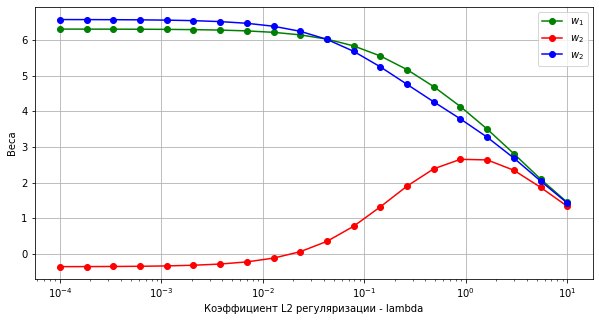

In [ ]:
plt.figure(figsize=(10, 5))
plt.xscale('log')

plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_2$')
plt.xlabel('Коэффициент L2 регуляризации - lambda')
plt.ylabel('Веса')
plt.grid()
plt.legend()

# * Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Можно попробовать, но результат того не стоит.

Лучше к признакам, имеющим нормальное распределение, применять нормализацию, а к категориальным признакам, которые будут использоваться в кластерном анализе, применять стандартизацию.

Причина применения нормализации - разные признаки обучающего набора данных могут быть представлены в разных масштабах и изменяться в разных диапазонах.

Причина применения стандартизации = обеспечение возможности корректного сравнения значений наблюдений, собранных одними и теми же методами, но в различных условиях.

# * Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [ ]:
def gradient_descent_reg_l1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        grad = 1/n * 2 * np.dot((y_pred - y), X.T)
        L1 = (lambda_/2) * np.sum(np.abs(W)) # штраф)))
        W -= (alpha * (grad + L1))
        if i % (iterations / 10) == 0:
            print(f' Iter:{i}, weights {W}, error: {err}')

    return W

In [ ]:
W = gradient_descent_reg_l1(X_st, y, iterations=1000, alpha=1e-2)

 Iter:100, weights [49.19303294  3.75480746  3.14184613  5.37021111], error: 83.66818687550209
 Iter:200, weights [55.53095313  4.74722069  2.35012271  5.28555944], error: 27.385752793452365
 Iter:300, weights [56.37148529  5.31516793  1.76188867  5.34628658], error: 25.737610891281463
 Iter:400, weights [56.48295629  5.65244885  1.32177302  5.47505889], error: 25.391233316897384
 Iter:500, weights [56.49773952  5.85806504  0.98478099  5.62380921], error: 25.21079109834948
 Iter:600, weights [56.49970007  5.98742213  0.72209273  5.76922416], error: 25.102893547280864
 Iter:700, weights [56.49996007  6.0717601   0.51458897  5.90109287], error: 25.034796664162048
 Iter:800, weights [56.49999456  6.12886085  0.34909791  6.01594434], error: 24.990641978414082
 Iter:900, weights [56.49999913  6.16897942  0.2162143   6.11362691], error: 24.961634898210562
 Iter:1000, weights [56.49999973  6.19813561  0.10900623  6.1954946 ], error: 24.942461361968803


Здравствуйте, 2 замечания:
1. L1-регуляризация написана некорректно - мы обновляем веса на производную функции потерь, в вашей же реализации получается что-то близкое к L2.
2. Вы не объяснили, почему одновременное применение стандартизации и нормализации "того не стоит".